# Machine Learning Project - Fraud Detection :
---
- ### Write a program to predict whether a transaction is fraudulent or not.

- ### Your task is to choose multiple machine learning algorithms and compare their accuracy in predicting fraudulent transactions.

- ### Once you have chosen an algorithm with good performance, your next step will be training the model using available data. You may also need to preprocess the data by cleaning up missing values or removing outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading our dataset into pandas dataframe :

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data_Science/Projects/ML Projects/Datasets/Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Checking details of our dataframe :

In [3]:
data.shape

(6362620, 11)

In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Checking null data :

In [7]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


# Checking outliers using box plot :
- ### Below code iterates through each column in the dataframe and creates a boxplot for columns with numerical data types (float64 or int64).

step


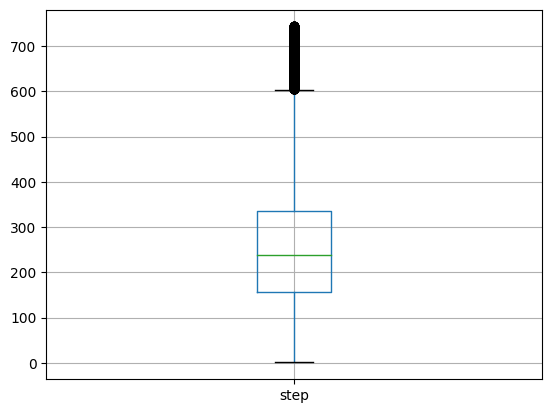

amount


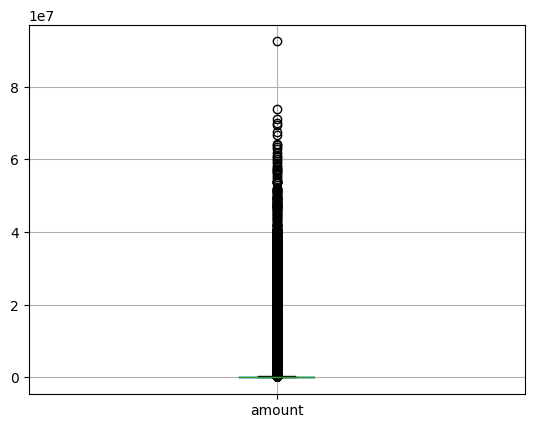

oldbalanceOrg


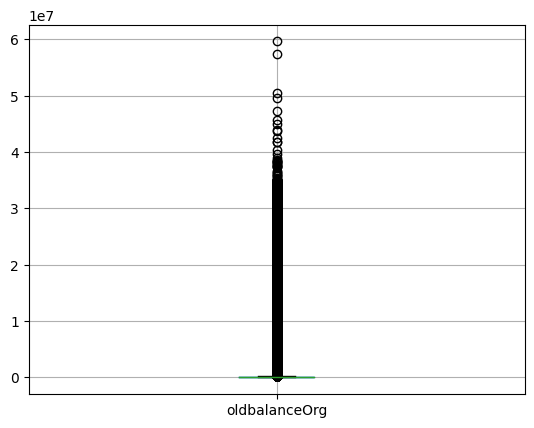

newbalanceOrig


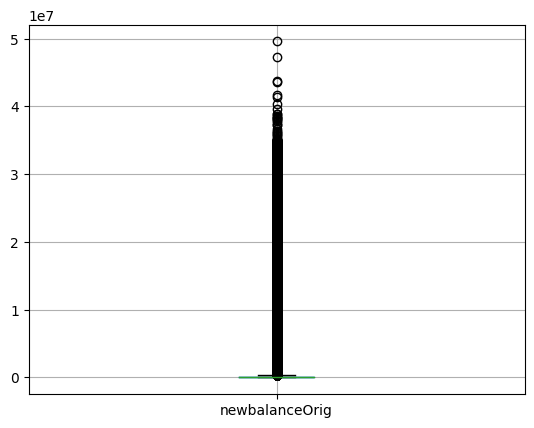

oldbalanceDest


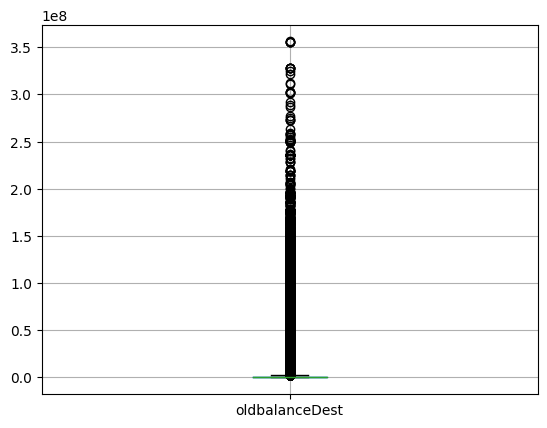

newbalanceDest


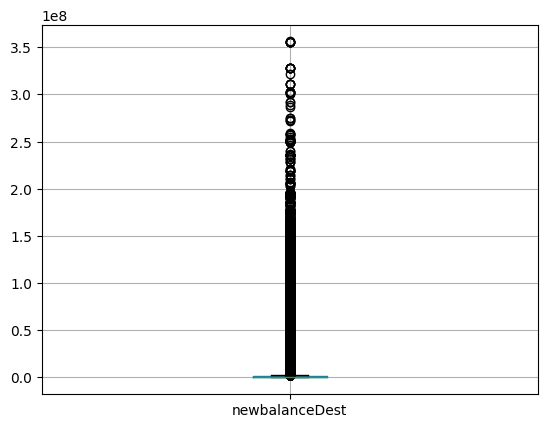

isFraud


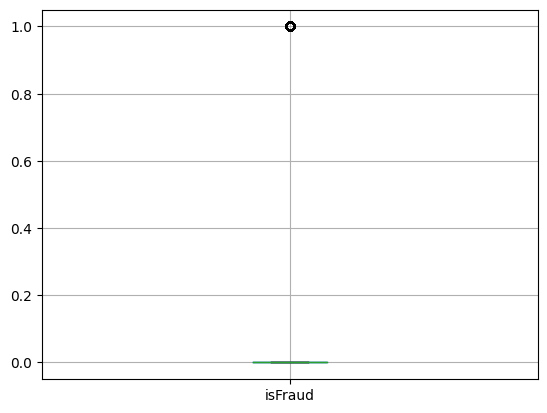

isFlaggedFraud


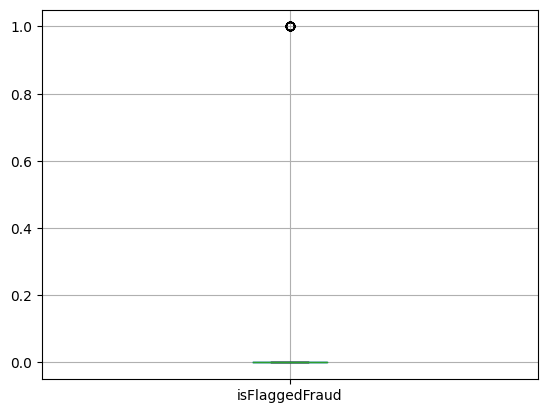

In [8]:
for col in data.columns :
    if data[col].dtype == 'float64' or data[col].dtype == 'int64' :
        print(col)
        data.boxplot(column = col)
        plt.show()
    else :
        pass

## As we can see the feature 'step' has some outliers. As we don't have significant outliers in other columns, we can just ignore the datapoints.
---
# **Checking Multicollinearity** :
- ### **Multicollinearity** is a phenomenon in which two or more independent variables in a dataset are highly correlated with each other. This can make it difficult to determine the individual effect of each variable on the dependent variable.
- ### Calculating the correlation between numerical columns in the dataframe :


In [9]:
correlation_matrix = data.corr(numeric_only = True)

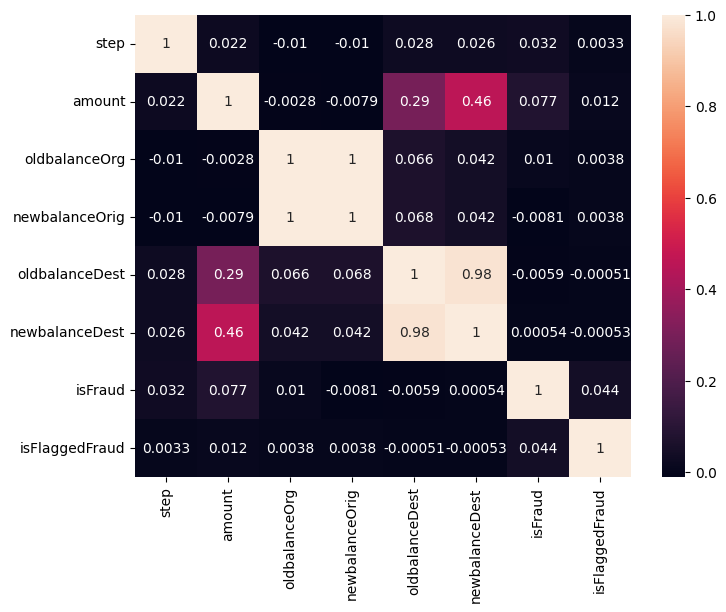

In [10]:
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

## The heatmap shows the correlation between the numerical features.

- ### **Positive Correlation :** **amount** and **oldbalanceOrg** have a positive correlation (0.29). This is also true for **newbalanceOrig** and **oldbalanceOrg** (0.99), and **amount** and **newbalanceOrig** (0.46).
- ### **Negative Correlation :** There is a negative correlation between **oldbalanceOrg** and **errorBalanceOrig** (-0.3). This is also true for **newbalanceOrig** and **errorBalanceOrig** (-0.36).
- ### **No Correlation :** Most of the features have no correlation with the **isFraud** and **isFlaggedFraud** columns.
- ### This suggests that fraudulent transactions are not easily distinguishable based on simple correlations between these features.
---
# Creating new features :
- ### Calculating the change in balance for the originator and destination by subtracting the old balance from the new balance.
- ### By creating **balanceChangeOrig** and **balanceChangeDest**, we can  capture the net change in balances for both the originator and receiver of the transaction. This is more informative than simply having separate features for old and new balances.

In [11]:
data['balanceChangeOrig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balanceChangeDest'] = data['newbalanceDest'] - data['oldbalanceDest']

# Dropping old features :

In [12]:
data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis = 1, inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   nameOrig           object 
 4   nameDest           object 
 5   isFraud            int64  
 6   isFlaggedFraud     int64  
 7   balanceChangeOrig  float64
 8   balanceChangeDest  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 436.9+ MB


## So as we can see we have 2 new columns while we have removed the 4 old columns.
---
# Again plotting correlation matrix :

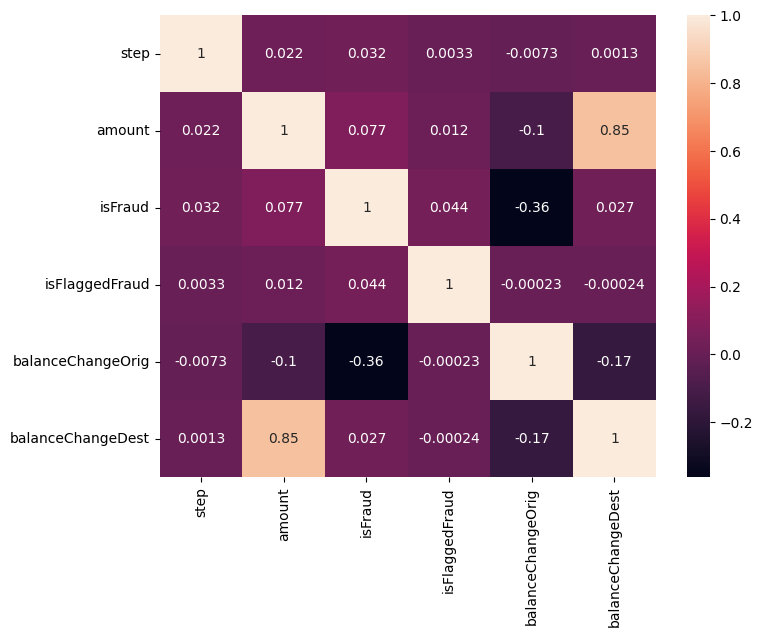

In [14]:
correlation_matrix = data.corr(numeric_only = True)
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

### The new heatmap reveals that **'balanceChangeOrig'** is negatively correlated with **'isFraud'**. This means that in fraudulent transactions, the originator's balance tends to decrease more significantly. This insight wouldn't have been as clear by just looking at the old and new balance features separately.
---
# performs one-hot encoding on the **'type'** column and removes the original column :

In [15]:
encoded_types = pd.get_dummies(data['type'], prefix = 'type')
data = pd.concat([data, encoded_types], axis = 1)
data.drop(['type'], axis = 1, inplace = True)

# As we can see below - all those types have been converted into different columns.

In [16]:
data.head()

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,M1979787155,0,0,-9839.64,0.0,False,False,False,True,False
1,1,1864.28,C1666544295,M2044282225,0,0,-1864.28,0.0,False,False,False,True,False
2,1,181.00,C1305486145,C553264065,1,0,-181.00,0.0,False,False,False,False,True
3,1,181.00,C840083671,C38997010,1,0,-181.00,-21182.0,False,True,False,False,False
4,1,11668.14,C2048537720,M1230701703,0,0,-11668.14,0.0,False,False,False,True,False


## Encoding the **'nameOrig'** and **'nameDest'** columns using **LabelEncoder** to transform categorical values into numerical representations :

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['nameOrig'] = le.fit_transform(data['nameOrig'])
data['nameDest'] = le.fit_transform(data['nameDest'])

In [18]:
data.head()

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,1662094,0,0,-9839.64,0.0,False,False,False,True,False
1,1,1864.28,2188998,1733924,0,0,-1864.28,0.0,False,False,False,True,False
2,1,181.00,1002156,439685,1,0,-181.00,0.0,False,False,False,False,True
3,1,181.00,5828262,391696,1,0,-181.00,-21182.0,False,True,False,False,False
4,1,11668.14,3445981,828919,0,0,-11668.14,0.0,False,False,False,True,False


# Defining features and target variable :

In [19]:
x = data.drop(['isFraud'], axis = 1)
y = data['isFraud']

# Balancing the classes using Oversampling (SMOTE) :

In [20]:
y.value_counts()

,count
isFraud,
0,6354407
1,8213


In [21]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE :
smote = SMOTE(random_state = 2)

# Resamples the data :
x_resampled, y_resampled = smote.fit_resample(x, y)

In [22]:
y_resampled.value_counts()

,count
isFraud,
0,6354407
1,6354407


# Splitting our data into training and testing sets :

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 2)

# Scaling features :
## Scaling our features might improve the performance of Logistic Regression, but it's not necessary for Decision Tree or Random Forest. Here's why:

- ### **Logistic Regression :** Logistic Regression uses gradient descent, which can be sensitive to feature scales. Scaling ensures that all features contribute equally to the model.

- ### **Decision Tree and Random Forest :** These models are based on decision rules that split data based on feature values. **The scale of the features doesn't affect the splits.**

In [24]:
from sklearn.preprocessing import StandardScaler

# Initializes the scaler :
scaler = StandardScaler()

# Fits and transforms the training data :
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data (using the same scaler)
x_test_scaled = scaler.transform(x_test)

## Now we will test out three of the most important models used for any kind of transaction detection - Logistic Regression, Decision Tree Classifier and Random Forest Classifier.
---
# Logistic Regression :

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
print("Logistic Regression Accuracy :", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy : 0.9697493432707928


# Decision Tree Classifier :

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
print("Decision Tree Classifier Accuracy :", accuracy_score(y_test, y_pred_dtc))

Decision Tree Classifier Accuracy : 0.9949346182157818


# Random Forest Classifier :
- ### As we have large dataset, so we are reducing the number of estimators (trees) by giving **'n_estimators = 50'**. The default value of **n_estimators** in **RandomForestClassifier** is **100**.
- ### **'n_jobs'** parameter tells the classifier how many cores to use. Setting it to **-1** will use all available cores.
- ### **max_depth :** This parameter limits the depth of each tree in the forest. Smaller depths can reduce the training time, but might also decrease the model's accuracy.
- ### **min_samples_split :** This is the minimum number of samples required to split an internal node. Increasing this value can lead to faster training, as the trees will be less complex.
- ### **max_features :** This parameter determines the number of features to consider when looking for the best split. Using 'sqrt' will consider the square root of the total number of features at each split, reducing the number of features to evaluate and potentially speeding up training.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, n_jobs = -1, max_depth = 10, min_samples_split = 5,
                             max_features = 'sqrt')
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
print("Random Forest Classifier Accuracy :", accuracy_score(y_test, y_pred_rfc))

Random Forest Classifier Accuracy : 0.9776780919385482


## So Decision Tree Classifier has the highest accuracy and it should be used for binary classification in financial related data.